In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r"C:\Users\HP\Desktop\ASHFA\data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [6]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

* plotting using pandas

<Axes: xlabel='job_schedule_type'>

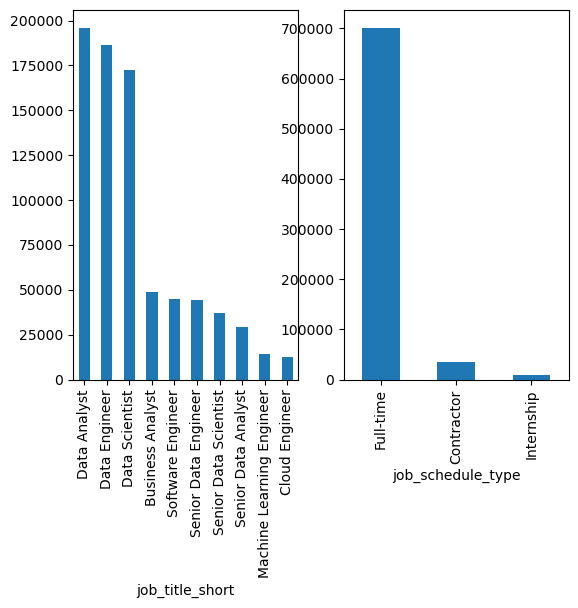

In [ ]:
# accesses is the individual plots and figure is entire thing

fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

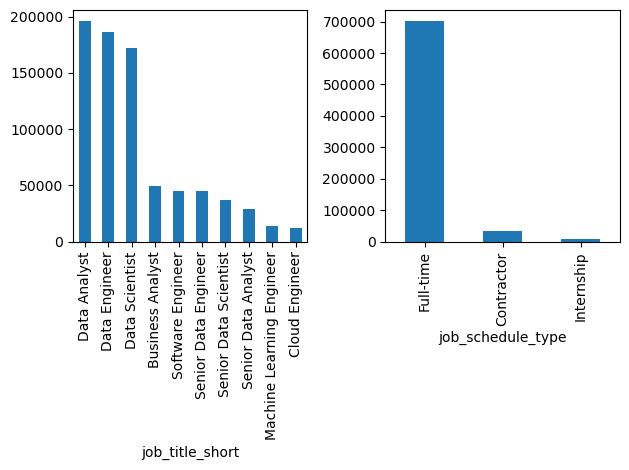

In [12]:
# the numbers are over lapping each other. so we are using 'tight layout function'

fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

* Alternatively, we can plot how Matplotlib intended

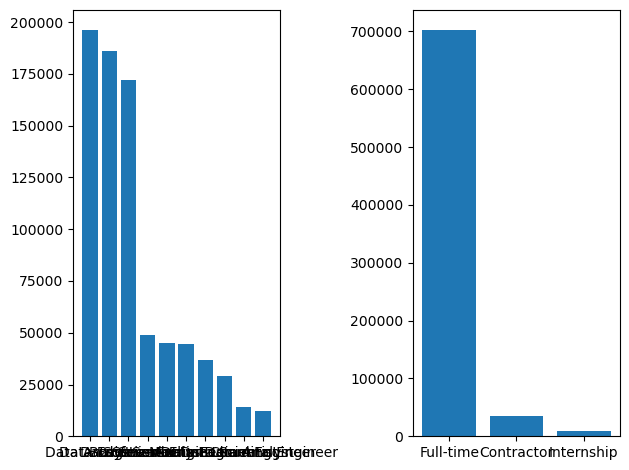

In [13]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

plt.show()

In [7]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [9]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

0 Data Scientist
1 Data Engineer
2 Data Analyst


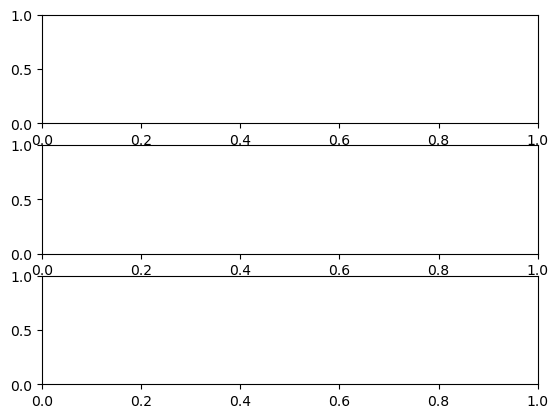

In [21]:
fig , ax = plt.subplots(3,1)

for i, job_titles in enumerate(job_titles):
    print(i, job_titles)

     job_skills job_title_short  skill_count
1480     python  Data Scientist       113711
1823        sql  Data Scientist        78982
1518          r  Data Scientist        59566
1637        sas  Data Scientist        29534
1943    tableau  Data Scientist        29445
     job_skills job_title_short  skill_count
1822        sql   Data Engineer       113130
1479     python   Data Engineer       108022
141         aws   Data Engineer        62049
151       azure   Data Engineer        60674
1772      spark   Data Engineer        53656
     job_skills job_title_short  skill_count
1821        sql    Data Analyst        92428
558       excel    Data Analyst        66860
1478     python    Data Analyst        57190
1941    tableau    Data Analyst        46455
1410   power bi    Data Analyst        39380


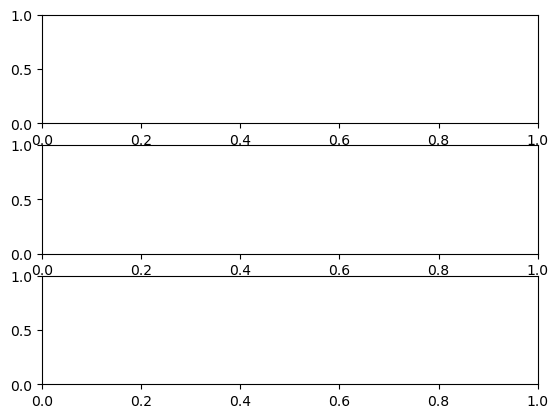

In [ ]:
fig , ax = plt.subplots(3,1)

for i, job_titles in enumerate(job_titles):
   print(df_skills_count[df_skills_count['job_title_short'] == job_titles].head(5))

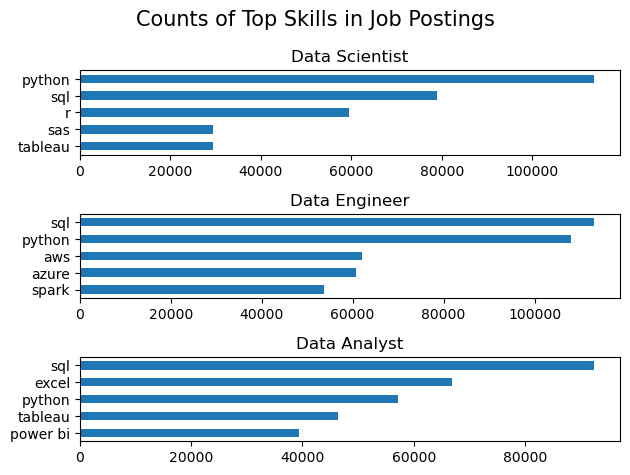

In [40]:
fig , ax = plt.subplots(3,1)

for i, job_titles in enumerate(job_titles):         # i is index
   df_plot = df_skills_count[df_skills_count['job_title_short'] == job_titles].head(5)
   df_plot.plot(kind='barh', x='job_skills' , y='skill_count', ax=ax[i], title=job_titles)
   ax[i].invert_yaxis()
   ax[i].set_ylabel('')
   ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()

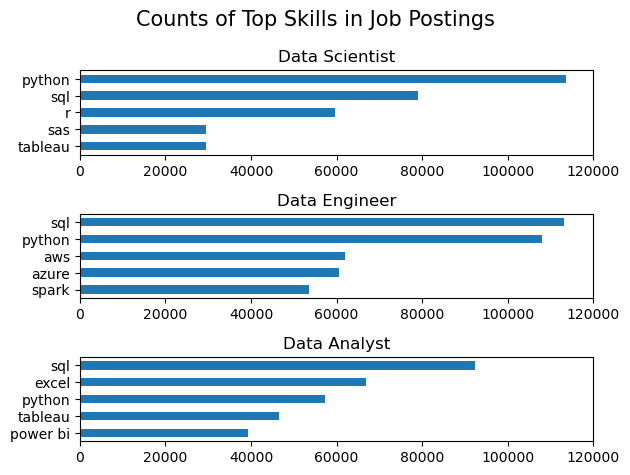

In [ ]:
# in here data scientist and data engineer have a similar axis (100000), but data analyst there not in the same axis

fig , ax = plt.subplots(3,1)

for i, job_titles in enumerate(job_titles):         # i is index
   df_plot = df_skills_count[df_skills_count['job_title_short'] == job_titles].head(5)
   df_plot.plot(kind='barh', x='job_skills' , y='skill_count', ax=ax[i], title=job_titles)
   ax[i].invert_yaxis()
   ax[i].set_ylabel('')
   ax[i].legend().set_visible(False)
   ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()

In [12]:
plt.savefig('Counts of Top Skills in Job Postings.png')

plt.show()

<Figure size 640x480 with 0 Axes>